## 1.Proceso de Poisson
Un proceso de Poisson es un modelo matematico que describe la ocurrencia de eventos en el tiempo, suponiendo:

-Los eventos ocurren de manera independiente.

-La tasa promedio de ocurrencia es constante: $\lambda = 5$ eventos por hora en este caso.

-El numero de eventos en un intervalo de longitud fija sigue una distribucion de Poisson:

$ P(N(T)=k)=\frac{e^{−λT}(λT)^k​}{k!}$

Aqui:

-N(T)= numero de eventos en el tiempo T.

-λT= media y varianza de la distribucion de Poisson.

## 2. Distribución exponencial (tiempos entre eventos)

Aunque el conteo de eventos en un intervalo sigue una Poisson, los tiempos entre eventos consecutivos se distribuyen de manera exponencial con parámetro λ:

$f(x) = \lambda e^{-\lambda x}$

Esto significa:

-El tiempo de espera hasta el proximo evento tiene valor esperado 1/ $\lambda$.

-En este ejercicio: $E[X]=\frac{1}{5}=0.2h=12min$


## 3. Función de distribución acumulada (CDF)

La CDF de la exponencial es:

$F(x)=1−e^{−λx}$

Nos da la probabilidad de que el tiempo hasta el próximo evento sea menor que x. Notar que si x es aproximadamente 12min entonces hay mayor probabilidad que los tiempos entre eventos sean cortos.

## 4. Método de la transformada inversa

Para simular variables aleatorias exponenciales, se utiliza el método de la transformada inversa:

-Se genera un número aleatorio uniforme u∼u(0,1).

-Se iguala:

$u=F(x)=1−e^{−λx}$

-Despejando:

$x=−\frac{1}{λ}ln⁡(1−u)$

Esto nos da los tiempos entre eventos.

## 5. Simulación hasta un tiempo finito T

-El algoritmo conceptual es:

1)Se empieza en t=0.

2)Se genera un tiempo de espera exponencial x. (Son los incrementos en el tiempo acumulado).

3)Se suma: t←t+x , es decir t = t + x es el tiempo acumulado, donde x son los incrementos de tiempo entre los eventos (es decir x modela el tiempo entre eventos y sigue una distribucion exponencial).

4)Si t≤T, se cuenta un evento; si no, se detiene.

5)Repetir.

Al final tendremos una secuencia de tiempos de ocurrencia de los eventos en [0,T]. Para cada evento se le asocia un tiempo.

## 6. Conexión entre exponencial y Poisson

-Si contamos cuántos eventos ocurrieron en el intervalo de longitud  T=3 horas, ese número debe seguir una Poisson con parámetro λT=5⋅3=15.

-Es decir: en promedio deberían ocurrir 15 eventos en esas 3 horas.

## EN RESUMEN:

-Distribución exponencial → modela el tiempo entre eventos.

-Proceso de Poisson → modela el número total de eventos en un intervalo fijo.

-Transformada inversa → técnica para generar los tiempos de espera (saltos) a partir de uniformes.

-Simulación → acumular saltos hasta el tiempo total 
T=3.

Distribución exponencial: La distribución exponencial viene dada por:

$f(x)=\lambda e^{-\lambda x}$

y podemos calcular su CDF como:

$F(x)=\int_0^x \lambda e^{-\lambda x'}dx' = 1 - e^{-\lambda x}$

cuya inversa resulta en:
    
$y = 1 - e^{-\lambda x} \quad\Longleftrightarrow\quad x = -\frac{\ln(1-y)}{\lambda}$

Si repetimos muchas veces el experimento, el resultado en un intervalo de longitud fija debe aproximar una distribución de Poisson, la cual viene dada por:

$p(k)=\frac{e^{-\lambda}\lambda^{k}}{k!}$


In [ ]:
import numpy as np

def simulate_poisson_process(lam, T ):
    """
    Simula un proceso de Poisson homogéneo con tasa lam (eventos por unidad de tiempo)
    hasta el tiempo T, usando el método de la transformada inversa para los tiempos
    entre eventos (Exponencial(lam)).

    Devuelve:
      - event_times: array con los tiempos de ocurrencia en (0, T]
      - n_events: cantidad total de eventos en [0, T]
    """


    t = 0.0
    event_times = [] # Lista para almacenar los tiempos de eventos.

    while True: # Bucle hasta que el tiempo exceda T
        # Genero U ~ Uniform(0,1)
        u = np.random.uniform() # Genero un número aleatorio U entre 0 y 1
        # Tiempo entre eventos: X = -ln(1-U)/lam
        x = -np.log(1.0 - u) / lam # son los saltos de tiempo entre eventos
        t = t + x # Actualizo el tiempo actual, se va sumando los saltos, tiempo acumulado
        if t > T:
            break
        event_times.append(t) #Almaceno en una lista los tiempos de eventos

    event_times = np.array(event_times) # Convierto la lista a un array de numpy
    return event_times, len(event_times) # Devuelvo los tiempos de eventos y la cantidad de eventos



if __name__ == "__main__": #sirve para que el código dentro de este bloque solo se ejecute si el archivo se ejecuta como un script, no si se importa como un módulo
    #un script es un archivo que contiene código que se puede ejecutar directamente, un modulo es un archivo que contiene definiciones y declaraciones de Python que se pueden reutilizar en otros archivos
    lam = 5.0   # eventos por hora
    T = 3.0     # horas

    times, k = simulate_poisson_process(lam, T)
    print(f"Tasa λ = {lam}/h, horizonte T = {T} h")
    print(f"Número de eventos simulados N(T) = {k} (esperado ≈ λ·T = {lam*T:.0f})")
    print("Tiempos de ocurrencia (h):")
    print(np.round(times, 4))

    # Validación empírica vs. teoría
    #Solo 15 aprox eventos por simulacion. Esto porque limito tiempo a T=3h (en el codigo siguiente no lo limito y genero 10000 saltos de tiempo entre eventos y por lo tanto 10000 eventos)
    n_runs = 10000 # cantidad de simulaciones independientes
    counts = []     # lista para almacenar los conteos de eventos (APROX 15) en cada simulación
    for i in range(n_runs): # simulo n_runs veces el proceso
        i, k = simulate_poisson_process(lam, T) #
        counts.append(k) # almaceno la cantidad de eventos en cada simulación en la lista counts (lista de 10000 elementos)

    counts = np.array(counts) # convierto la lista a un array de numpy
    mean_counts = counts.mean() # calculo la media empírica de los conteos

    print("\nValidación (empírico vs. teoría Poisson(λT)):")
    print(f"Media empírica    ≈ {mean_counts:.3f}    (teórica: {lam*T:.3f})")


Tasa λ = 5.0/h, horizonte T = 3.0 h
Número de eventos simulados N(T) = 15 (esperado ≈ λ·T = 15)
Tiempos de ocurrencia (h):
[0.0256 0.1672 0.1745 0.4807 0.8297 0.8396 0.9769 1.3968 2.073  2.3077
 2.5095 2.5553 2.7843 2.8759 2.8806]

Validación (empírico vs. teoría Poisson(λT)):
Media empírica    ≈ 15.050    (teórica: 15.000)


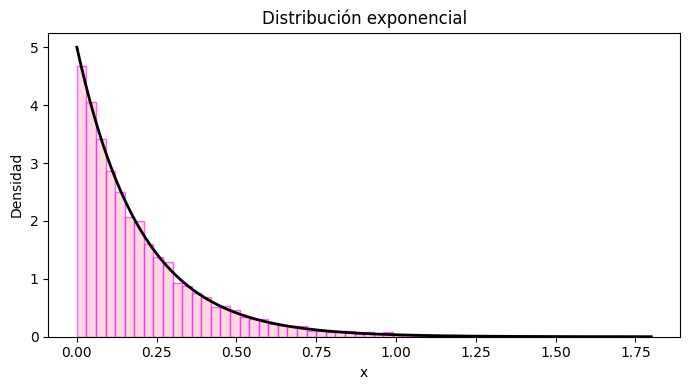

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lam = 5.0         # tasa de eventos (eventos por unidad de tiempo)
n   = 10000   # cantidad de muestras para que el histo se vea suave(es como pensar que no tengo que cumplir ninguna restriccion de tiempo T, hago el experimento muchas veces)

# Genero exponenciales por transformada inversa:
u = np.random.uniform(size=n) #10000 numeros aleatorios y por lo tanto 10000 saltos de tiempo entre eventos
x = -np.log(1.0 - u) / lam   # tiempos entre eventos ~ Exp(lam)

# Histograma (densidad) y PDF teórica superpuesta
plt.figure(figsize=(7,4))
plt.hist(x, bins=60, range=(0, 1.8), density=True, alpha=0.6, color='pink', edgecolor='fuchsia')
#Si arriba pongo density=False, el histograma muestra conteos absolutos en lugar de densidad de probabilidad. La suma de las alturas de las barras no será igual a 1 (frecuencia relativa).

#color de la distribución exponencial
xx = np.linspace(0, 1.8, 400)
pdf = lam * np.exp(-lam * xx)
plt.plot(xx, pdf, linewidth=2, color='black')

plt.title("Distribución exponencial")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

# Estoy demostrando que los saltos de tiempo entre eventos siguen una distribución exponencial con parámetro lam.
# Es más probable que los saltos sean pequeños (eventos cercanos en el tiempo) y menos probable que sean grandes (eventos muy separados en el tiempo).

Repetir 100.000 simulaciones del proceso de Poisson hasta 
T=3
T=3 h sumando saltos exponenciales (transformada inversa).

Guardar el conteo 
N(T)
N(T) de cada corrida.

Graficar el histograma normalizado (frecuencia relativa) de esos conteos en barras amarillas y superponer la Poisson teórica con parámetro 
μ=λT=15
μ=λT=15 en bordes negros.

Media empírica  de N(T): 15.006  (teórica: 15.000)
Varianza empírica de N(T): 14.948 (teórica: 15.000)


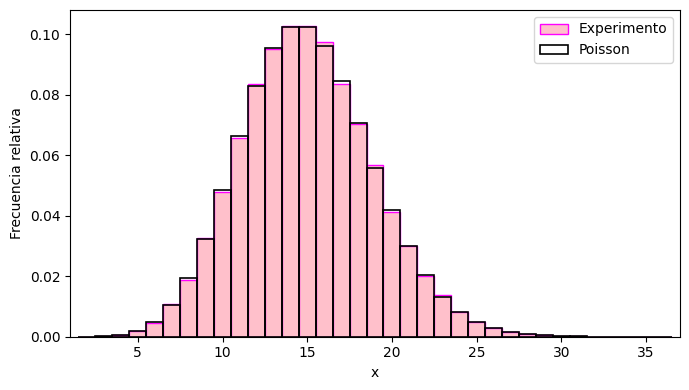

In [ ]:

import math

# -------------------------------
# Parámetros del problema
# -------------------------------
lam = 5.0        # tasa (eventos por hora)
T   = 3.0        # horizonte (horas)
mu  = lam * T    # parámetro de Poisson teórica para N(T)
n_runs = 100_000 # cantidad de simulaciones
seed = 42        # para reproducibilidad

rng = np.random.default_rng(seed)

# -------------------------------
# Función: una simulación del proceso hasta T
# Suma saltos exponenciales (transformada inversa)
# y devuelve el conteo N(T)
# -------------------------------
def simulate_one_count(lam, T, rng):
    t = 0.0
    k = 0
    while True:
        u = rng.uniform()                # U ~ U(0,1)
        x = -np.log(1.0 - u) / lam       # salto ~ Exp(lam) (transformada inversa)
        t += x
        if t > T:
            return k
        k += 1

# -------------------------------
# Simulaciones: repetimos 100.000 veces
# -------------------------------
counts_sim = np.fromiter((simulate_one_count(lam, T, rng) for _ in range(n_runs)),
                         dtype=int, count=n_runs)

# Métricas para chequear
print(f"Media empírica  de N(T): {counts_sim.mean():.3f}  (teórica: {mu:.3f})")
print(f"Varianza empírica de N(T): {counts_sim.var(ddof=1):.3f} (teórica: {mu:.3f})")

# -------------------------------
# Gráfico: histograma vs. Poisson teórica
# -------------------------------
# Bins centrados en enteros: [k-0.5, k+0.5]
kmin = max(0, counts_sim.min())
kmax = max(35, counts_sim.max())  # ~35 queda bien para mu=15
bins = np.arange(kmin - 0.5, kmax + 1.5, 1.0)

plt.figure(figsize=(7,4))

# 1) Histograma normalizado (frecuencia relativa) de la simulación
plt.hist(
    counts_sim,
    bins=bins,
    density=True,                 # normaliza para comparar con la PDF teórica
    facecolor="pink",
    edgecolor="fuchsia",
    label="Experimento"
)

# 2) Poisson teórica: PDF en enteros k con “bordes negros”
k_vals = np.arange(kmin, kmax + 1)
pmf = np.exp(-mu) * np.power(mu, k_vals) / np.array([math.factorial(k) for k in k_vals])
plt.bar(
    k_vals, pmf, width=1.0,
    facecolor="none", edgecolor="black", linewidth=1.2,
    label="Poisson"
)

# Etiquetas y estética
plt.xlabel("x")
plt.ylabel("Frecuencia relativa")
plt.xlim(kmin-1, kmax+1)
plt.legend()
plt.tight_layout()
plt.show()


Qué hace cada parte (resumen rápido)

simulate_one_count: implementa el método de la transformada inversa para generar un salto exponencial 
X=−ln⁡(1−U)/λ
X=−ln(1−U)/λ y acumula hasta pasar  T. Cada corrida devuelve el conteo N(T).

counts_sim: lista de 
N(T)
N(T) para 100.000 corridas.

El histograma usa density=True (frecuencia relativa) para que se pueda comparar directamente con la PDF de Poisson (barras de bordes negros).

La simulación confirmó lo esperado teóricamente: los tiempos entre eventos generados por transformada inversa siguen una distribución exponencial con λ = 5/h (hay muchos saltos pequeños y pocos grandes). Al acumular esos saltos hasta T = 3 h, el número de eventos N(T) se comporta como una Poisson con parámetro λT = 15. La media y la varianza empíricas quedaron muy cerca de 15 (coherente con que en Poisson media = varianza) y el histograma de los conteos ajustó bien a la distribución teórica. En resumen, el experimento verifica la relación entre tiempos exponenciales y conteos Poisson y muestra que el método de la transformada inversa funciona correctamente.